<a href="https://colab.research.google.com/github/sarjakpatel/AIRoyal/blob/master/NoiseReductionAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


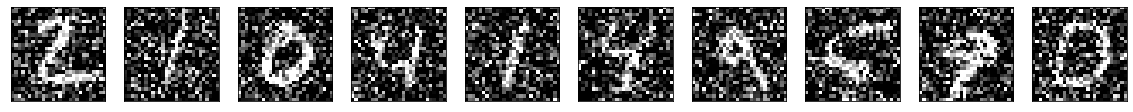

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
input_img = keras.Input(shape=(28, 28, 1))

#Encoder

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

#Decoder

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [26]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1697 - val_loss: 0.1186
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1143 - val_loss: 0.1093
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1083 - val_loss: 0.1053
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1051 - val_loss: 0.1030
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1032 - val_loss: 0.1014
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1019 - val_loss: 0.1008
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1007 - val_loss: 0.0993
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0998 - val_loss: 0.0990
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0993 - val_loss: 0.0979
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0986 - val_loss: 0.0976

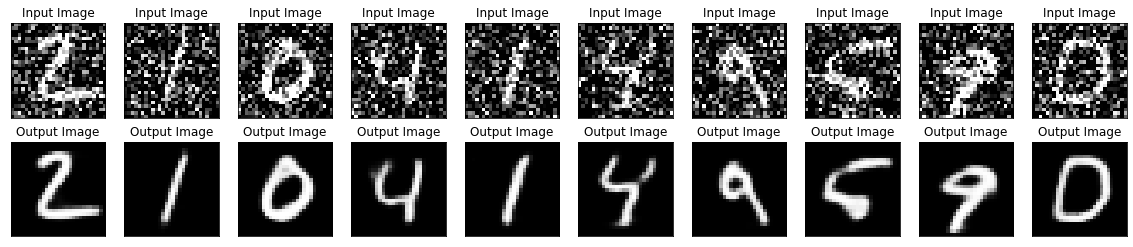

In [27]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original Image
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("Input Image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction Image
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("Output Image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
}